In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from keras.models import load_model

from mnist_model.data import mnist_test_kaggle, classes, mnist_submission_kaggle
from mnist_model.plot import plot_some

/home/bw/.conda/envs/mnist-model/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Model file
model_file = '../models/c-32-5_p-2_c-64-5_p-2_f_d-1024_o-4__relu__rmsprop_categorical_crossentropy__128_20__2018-02-04_114418.hd5'

# Test data
data_file = '../data/test.csv'

# Load the test data

In [4]:
X = mnist_test_kaggle(data_file)

# Load the model

In [5]:
model = load_model(model_file)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
__________

# Predict on the test data

In [6]:
Y = model.predict(X)
labels = classes(Y)

## Plot some predictions

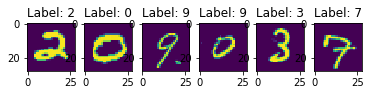

In [7]:
plot_some(X, labels, 6)

# Save the predictions

In [8]:
mnist_submission_kaggle('../data/submission.csv', labels)